# Access Dataset & Cleaning

In [182]:
import pandas as pd


# Load the dataset
df = pd.read_csv("Corona_NLP_test.csv", encoding='utf-8')


# display dataset

df.head(11)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [183]:
# DATASET ORIGINAL INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


# Check for missing values 

In [184]:
# Check for missing values
df.isnull().sum()

#  drop rows with missing values(NAN ) or blank from OriginalTweet or Sentiment column 
df = df.dropna(subset=['OriginalTweet', 'Sentiment'])
df.head(11)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [185]:
# Check for duplicate values(If rows contain the same tweet and sentiment, lets drop ) 

print(f"Duplicate values: {df.duplicated().sum()}")

# Drop if any duplicate rows 
df = df.drop_duplicates()


Duplicate values: 0


# Checking for Outliers

In [186]:
# Assign a text length column to our dataset
df['TweetLength'] = df['OriginalTweet'].apply(lambda x: len(str(x).split()))

# checking if tweets are less than 150 words long  
#(greater might indicate spam or off topic)

df['ValidTweetLength?'] = df['TweetLength'].apply(lambda x: x < 150)


df['ValidTweetLength?'].sum()
df.head(11)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetLength,ValidTweetLength?
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,True
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,30,True
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,13,True
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,37,True
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,True
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,35,True
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,12,True
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral,28,True
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative,52,True
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive,37,True


# EDA understand distributions and correlations

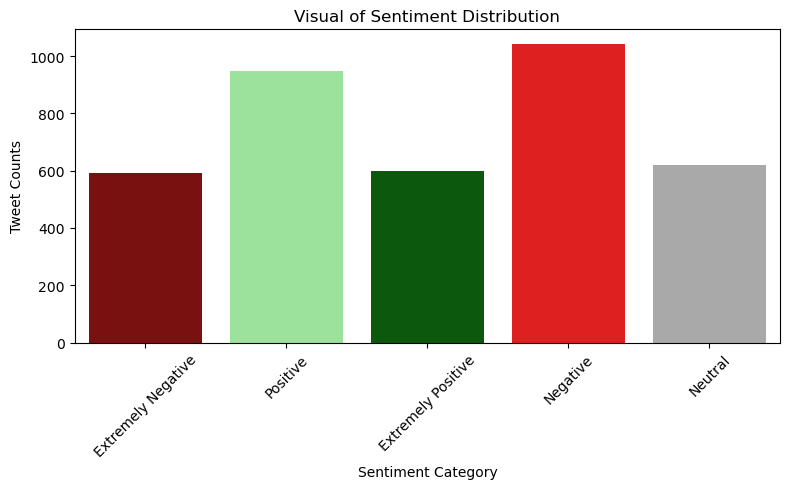

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Visual Observation for the sentiment 

# Define my color palette
colors = {
    'Extremely Negative': '#8B0000',  
    'Negative': '#FF0000',            
    'Neutral': '#A9A9A9',             
    'Positive': '#90EE90',            
    'Extremely Positive': '#006400'   
}




plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette= colors, legend=False)
plt.title('Visual of Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Tweet Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visual distribution of tweets Length

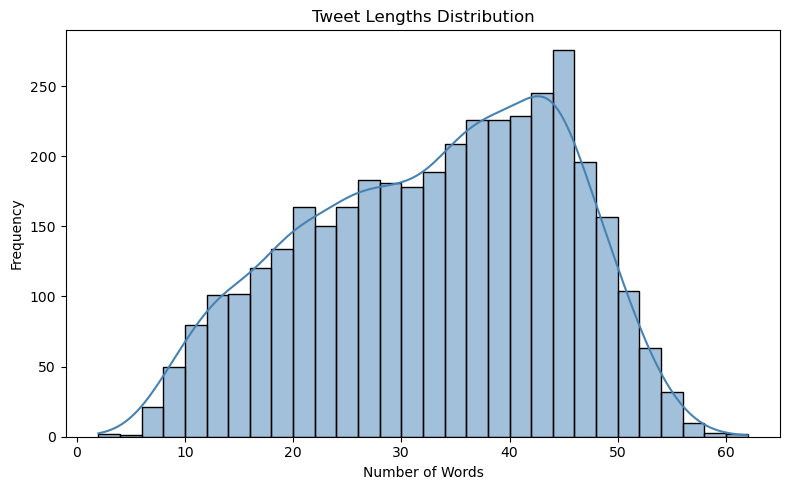

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['TweetLength'], bins=30, kde=True, color='steelblue')
plt.title('Tweet Lengths Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# SUMMARY of correlation
 Variables such as OriginalTweet is not a numerical data so it doesn’t directly participate in traditional correlation metrics. The Sentiment variable is a categorical label, will later be encoded numerically  to enable analysis. Smote will not be need as we using LDA which is unsupervised 



# Data pre-processing

In [189]:
import re
import string
import nltk
from nltk.corpus import stopwords


# define preprocessing function
def preprocess_text(text):
    
    if pd.isnull(text):
        return ""
    
    #  Lowercase
    text = text.lower()
    
  #  Remove URLs 
    text = re.sub(r"http\S+|www\S+", "", text)
    
    # HTML tags
    text = re.sub(r'<.*?>', '', text)
    
  
 # deals with words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)


 # Remove text in square brackets and the brackets also
    text = re.sub(r"\[.*?\]", "", text)
    
    
    #  Remove mentions and hashtags (keep words if needed)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)  
    
    #  Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    #  Remove digits
    text = re.sub(r"\d+", "", text)
    
    
    return text


In [190]:
#apply your preprocess_text to a column:CleanedTweet

#df['CleanedTweet'] = df['OriginalTweet'].apply(lambda x: preprocess_text(x))

df['Cleaned_Tweet'] = df['OriginalTweet'].apply(preprocess_text)

df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetLength,ValidTweetLength?,Cleaned_Tweet
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,True,trending new yorkers encounter empty supermark...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,30,True,when i couldnt find hand sanitizer at fred mey...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,13,True,find out how you can protect yourself and love...


In [191]:
# testing if data pre-pocessing is working
text=df['Cleaned_Tweet'][5]

print(text)

do you remember the last time you paid  a gallon for regular gas in los angelesprices at the pump are going down a look at how the coronavirus is impacting prices   


In [192]:

tokens = text.split()
print(tokens)

['do', 'you', 'remember', 'the', 'last', 'time', 'you', 'paid', 'a', 'gallon', 'for', 'regular', 'gas', 'in', 'los', 'angelesprices', 'at', 'the', 'pump', 'are', 'going', 'down', 'a', 'look', 'at', 'how', 'the', 'coronavirus', 'is', 'impacting', 'prices']


In [193]:
# get default set of English words 

stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
print(tokens)

['remember', 'last', 'time', 'paid', 'gallon', 'regular', 'gas', 'los', 'angelesprices', 'pump', 'going', 'look', 'coronavirus', 'impacting', 'prices']


# Exploratory Data Analysis

#  text_visualization

In [194]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_cloud(text_series, title="Word Cloud after Cleaned Tweets",
                  bg_color='white', colormap='plasma', max_words=200):
   
    # Concatenate all text into a single string
    text = ' '.join(text_series.dropna().astype(str))

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400,
                          background_color=bg_color,
                          colormap=colormap,
                          max_words=max_words,
                          random_state=42).generate(text)

    # Display the word cloud
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

    #  save wordcloud
    #wordcloud.to_file("CleanedTweet_WordCloud.png")


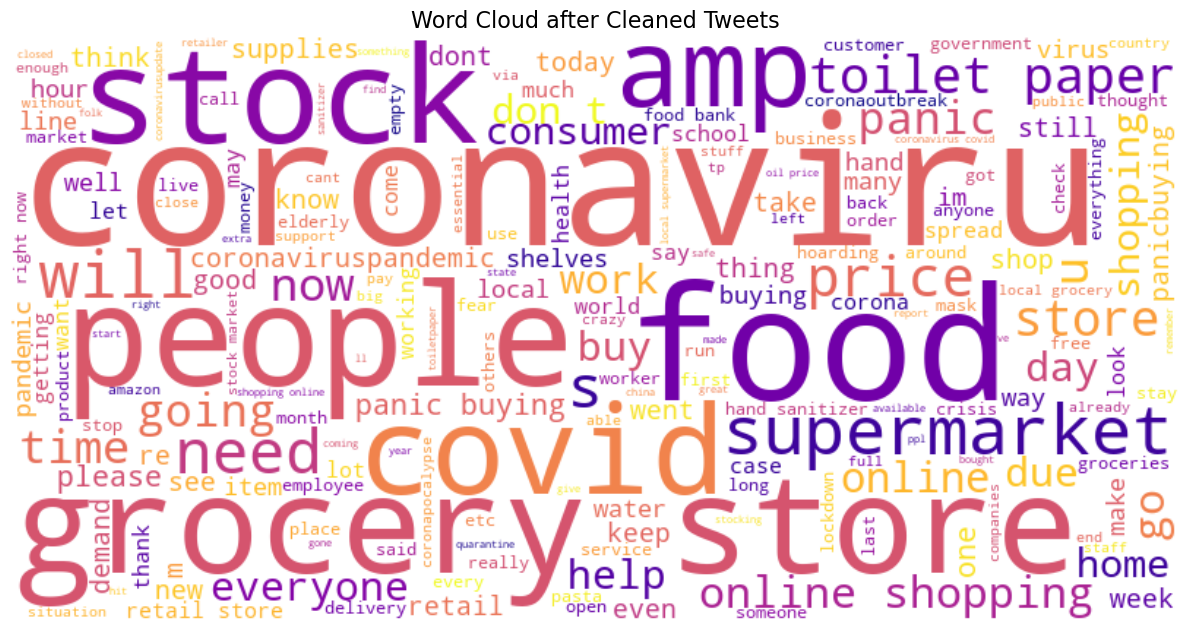

In [195]:
display_cloud(df['Cleaned_Tweet'])


## Bag of Words (BoW) repo

In [196]:
import collections
from collections import Counter

# defne token column(words)
df['Words'] = df['Cleaned_Tweet'].apply(lambda x: x.split())

#Bag of Words column
df['BagOfWords '] = df['Cleaned_Tweet'].apply(lambda x:Counter (x))



In [198]:
df.head(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetLength,ValidTweetLength?,Cleaned_Tweet,Words,BagOfWords
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,True,trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","{'t': 7, 'r': 15, 'e': 18, 'n': 12, 'd': 5, 'i..."
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,30,True,when i couldnt find hand sanitizer at fred mey...,"[when, i, couldnt, find, hand, sanitizer, at, ...","{'w': 2, 'h': 4, 'e': 11, 'n': 11, ' ': 30, 'i..."
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,13,True,find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ...","{'f': 3, 'i': 2, 'n': 5, 'd': 3, ' ': 12, 'o':..."
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,37,True,panic buying hits newyork city as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio...","{'p': 10, 'a': 14, 'n': 12, 'i': 12, 'c': 10, ..."


In [199]:
from collections import Counter

# Flatten the list of word lists in df['words']
bow = collections.Counter([word for tweet in df['Words'] for word in tweet])


#display list
print(bow)



Counter({'the': 4252, 'to': 3739, 'and': 2448, 'of': 2066, 'in': 1833, 'a': 1811, 'coronavirus': 1511, 'for': 1348, 'food': 1327, 'is': 1319, 'i': 1145, 'are': 1114, 'on': 1062, 'you': 1030, 'store': 1007, 'at': 902, 'this': 833, 'grocery': 815, 'covid': 798, 'stock': 779, 'people': 773, 'up': 731, 'be': 713, 'have': 696, 'that': 684, 'with': 624, 'we': 610, 'all': 601, 'it': 590, 'or': 585, 'amp': 579, 'my': 575, 'your': 534, 'not': 530, 'shopping': 522, 'if': 521, 'supermarket': 513, 'online': 508, 'will': 507, 'out': 500, 'as': 493, 'panic': 481, 'from': 443, 'they': 442, 'no': 439, 'prices': 433, 'but': 388, 'just': 388, 'so': 386, 'can': 382, 'about': 375, 'need': 366, 'toilet': 361, 'our': 360, 'paper': 350, 'like': 332, 'get': 327, 'now': 319, 'more': 313, 'what': 313, 'has': 304, 'their': 303, 'who': 294, 'do': 290, 'buying': 287, 'by': 283, 'me': 281, 'was': 281, 'how': 271, 'go': 259, 'going': 256, 'some': 252, 'us': 252, 'local': 245, 'please': 245, 'because': 245, 'retail':

In [200]:
bow

Counter({'the': 4252,
         'to': 3739,
         'and': 2448,
         'of': 2066,
         'in': 1833,
         'a': 1811,
         'coronavirus': 1511,
         'for': 1348,
         'food': 1327,
         'is': 1319,
         'i': 1145,
         'are': 1114,
         'on': 1062,
         'you': 1030,
         'store': 1007,
         'at': 902,
         'this': 833,
         'grocery': 815,
         'covid': 798,
         'stock': 779,
         'people': 773,
         'up': 731,
         'be': 713,
         'have': 696,
         'that': 684,
         'with': 624,
         'we': 610,
         'all': 601,
         'it': 590,
         'or': 585,
         'amp': 579,
         'my': 575,
         'your': 534,
         'not': 530,
         'shopping': 522,
         'if': 521,
         'supermarket': 513,
         'online': 508,
         'will': 507,
         'out': 500,
         'as': 493,
         'panic': 481,
         'from': 443,
         'they': 442,
         'no': 439,
         'p

In [201]:
#TF-IDF (Term Frequency–Inverse Document Frequency

In [202]:
from sklearn.feature_extraction.text import  TfidfVectorizer, CountVectorizer, TfidfTransformer

# Initializing the vectorizer
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=5, ngram_range=(1, 2)) 
# Fit the vectorizer
cvec.fit(df['Cleaned_Tweet'])



CountVectorizer(max_df=5, ngram_range=(1, 2), stop_words='english')

In [203]:
#calculation of n-grams

from itertools import islice

cvec.fit(df['Cleaned_Tweet'])
list(islice (cvec.vocabulary_.items(),20 ))

[('trending', 50345),
 ('yorkers', 54779),
 ('encounter', 15076),
 ('pictured', 35143),
 ('soldout', 44027),
 ('foodkick', 17979),
 ('maxdelivery', 28948),
 ('coronavirusfearing', 9825),
 ('trending new', 50347),
 ('new yorkers', 31156),
 ('yorkers encounter', 54780),
 ('encounter supermarket', 15079),
 ('shelves pictured', 42339),
 ('pictured wegmans', 35144),
 ('wegmans brooklyn', 53203),
 ('brooklyn soldout', 4755),
 ('soldout online', 44029),
 ('online grocers', 32223),
 ('grocers foodkick', 20240),
 ('foodkick maxdelivery', 17980)]

## Latent Dirichlet Allocation Analysis(LDA) (topic modeling)

In [204]:
from sklearn.feature_extraction.text import  TfidfVectorizer, CountVectorizer, TfidfTransformer

# Initializing the vectorizer

cv = CountVectorizer(stop_words='english', min_df=2, max_df=0.95, ngram_range=(2, 2)) 

In [205]:
dtm = cv.fit_transform(df['Cleaned_Tweet'])

In [206]:
from sklearn.decomposition import LatentDirichletAllocation

#Initializing the model
lda_model = LatentDirichletAllocation(n_components=7, random_state=42)
lda_model.fit(dtm)



LatentDirichletAllocation(n_components=7, random_state=42)

In [207]:
#fitting the model to the Doc matrix
singleTopic = lda_model.components_[0]
#  indices of the top 10 words in descending order
top_10_words = singleTopic.argsort()[-10:]




In [208]:
for index in top_10_words:
    print(cv.get_feature_names_out() [index] )

stock market
line grocery
coronavirus pandemic
corona virus
online grocery
toilet paper
grocery shopping
oil prices
grocery store
online shopping


In [209]:
for index, singleTopic in enumerate (lda_model.components_):

    print(f' The top 15 words for the topic #{index}')
    print([cv.get_feature_names_out() [i]  for i in singleTopic.argsort()[-15:] ])
    print('\n')
    

 The top 15 words for the topic #0
['just got', 'doing online', 'shopping coronavirus', 'gas prices', 'shopping online', 'stock market', 'line grocery', 'coronavirus pandemic', 'corona virus', 'online grocery', 'toilet paper', 'grocery shopping', 'oil prices', 'grocery store', 'online shopping']


 The top 15 words for the topic #1
['stay safe', 'free testing', 'food toilet', 'panic buying', 'make sure', 'online shopping', 'stock market', 'grocery stores', 'stock food', 'coronavirus covid', 'retail store', 'paid sick', 'sick leave', 'grocery store', 'toilet paper']


 The top 15 words for the topic #2
['piling food', 'food store', 'food amp', 'food coronavirus', 'panic buying', 'cat food', 'social media', 'need stock', 'covid outbreak', 'coronaviruspandemic coronaoutbreak', 'people stock', 'toilet paper', 'stock piling', 'shopping online', 'stock food']


 The top 15 words for the topic #3
['shop online', 'covid pandemic', 'americans stock', 'going stock', 'went supermarket', 'covid co

# Encoding the Y variable


In [210]:
# sentiment encoding
mapping1 = {
    'Extremely Negative': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 4,
    'Extremely Positive': 5
}

# encoding to a new column
df['Encoded_Sentiment'] = df['Sentiment'].map(mapping1)


df.head(6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetLength,ValidTweetLength?,Cleaned_Tweet,Words,BagOfWords,Encoded_Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,True,trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","{'t': 7, 'r': 15, 'e': 18, 'n': 12, 'd': 5, 'i...",0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,30,True,when i couldnt find hand sanitizer at fred mey...,"[when, i, couldnt, find, hand, sanitizer, at, ...","{'w': 2, 'h': 4, 'e': 11, 'n': 11, ' ': 30, 'i...",4
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,13,True,find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ...","{'f': 3, 'i': 2, 'n': 5, 'd': 3, ' ': 12, 'o':...",5
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,37,True,panic buying hits newyork city as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio...","{'p': 10, 'a': 14, 'n': 12, 'i': 12, 'c': 10, ...",1
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,True,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...","{'t': 10, 'o': 14, 'i': 9, 'l': 4, 'e': 20, 'p...",2
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,35,True,do you remember the last time you paid a gall...,"[do, you, remember, the, last, time, you, paid...","{'d': 3, 'o': 13, ' ': 34, 'y': 2, 'u': 5, 'r'...",2


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserName           3798 non-null   int64 
 1   ScreenName         3798 non-null   int64 
 2   Location           2964 non-null   object
 3   TweetAt            3798 non-null   object
 4   OriginalTweet      3798 non-null   object
 5   Sentiment          3798 non-null   object
 6   TweetLength        3798 non-null   int64 
 7   ValidTweetLength?  3798 non-null   bool  
 8   Cleaned_Tweet      3798 non-null   object
 9   Words              3798 non-null   object
 10  BagOfWords         3798 non-null   object
 11  Encoded_Sentiment  3798 non-null   int64 
dtypes: bool(1), int64(4), object(7)
memory usage: 330.2+ KB


In [212]:
df['Encoded_Sentiment'].head(4)

0    0
1    4
2    5
3    1
Name: Encoded_Sentiment, dtype: int64

# feature selection

# Model training & test split

In [213]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = df['Cleaned_Tweet']
y = df['Encoded_Sentiment'] #target


In [214]:
# Split the vectorized input and target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y, random_state=42)

#split dataset

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)



X_train: (3038,)
X_test: (760,)


# Main PIPELINE

In [215]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2)) 

# Naive Bayes model
nb_model = MultinomialNB()

# Build pipeline
Mypipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('nb', nb_model)
])


In [219]:
#Train the model

Mypipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [239]:
 text_clf.fit(X_train, y_train)

# Predict on test data
y_pred = text_clf.predict(X_test)


NameError: name 'text_clf' is not defined

In [240]:
# pipeline steps

from sklearn import set_config
set_config(display= "diagram")
Mypipeline

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

# MODEL EVALUATION 

In [252]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


#training and testing sets
y_train_pred = Mypipeline.predict(X_train)

y_test_pred = Mypipeline.predict(X_test)
y_test_proba = Mypipeline.predict_proba(X_test)
y_test_bin

# Calculate and print accuracy as percentages
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")

#  ROC AUC
roc_auc = roc_auc_score(y_test_bin, y_test_proba, average='weighted', multi_class='ovr')
print(f"Weighted ROC AUC: {roc_auc:.4f}")

#  classification report for test 
print("\n Result: (Test Set):\n")
print (classification_report(y_test, y_test_pred))


Training Accuracy: 64.42%
Testing Accuracy: 31.18%
Weighted ROC AUC: 0.6801

 Result: (Test Set):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.30      0.87      0.45       208
           2       0.67      0.02      0.03       124
           4       0.33      0.27      0.30       190
           5       1.00      0.02      0.03       120

    accuracy                           0.31       760
   macro avg       0.46      0.24      0.16       760
weighted avg       0.43      0.31      0.21       760



C:\Users\Windows 10 Pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 10 Pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 10 Pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


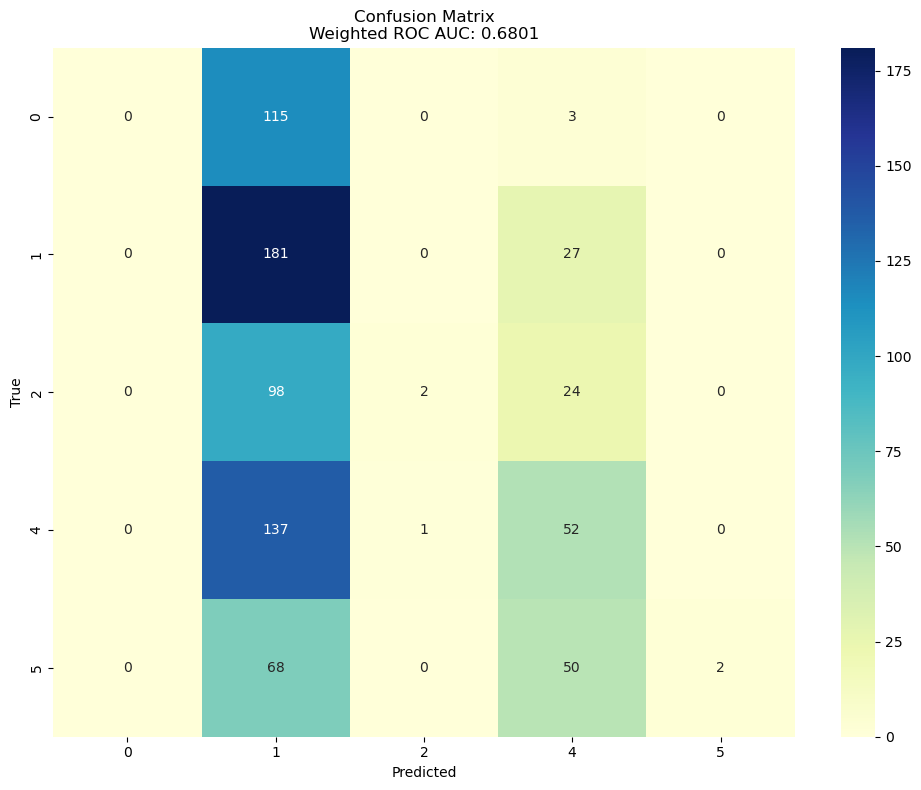

In [245]:
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize

# Binarize labels for ROC AUC
classes = sorted(df['Encoded_Sentiment'].unique())
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = Mypipeline.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_bin, y_prob, average='weighted', multi_class='ovr')
y_pred = Mypipeline.predict(X_test)
# Confusion Matrix
CM = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(CM, annot=True, fmt='d', cmap='YlGnBu', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nWeighted ROC AUC: {roc_auc:.4f}')
plt.tight_layout()
plt.show()


The model is overfitting, it is achieving moderate training accuracy (64.42%) but poor generalization on unseen data (31.18%).

# Improvement of  PIPELINE

In [247]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Define pipeline
logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=1000)),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Fit the pipeline
logreg_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_lr = logreg_pipeline.predict(X_test)


Training Accuracy: 67.25%
Testing Accuracy: 40.39%

 result:
               precision    recall  f1-score   support

           0       0.39      0.56      0.46       118
           1       0.40      0.26      0.32       208
           2       0.43      0.63      0.51       124
           4       0.34      0.24      0.28       190
           5       0.45      0.53      0.49       120

    accuracy                           0.40       760
   macro avg       0.40      0.44      0.41       760
weighted avg       0.40      0.40      0.39       760



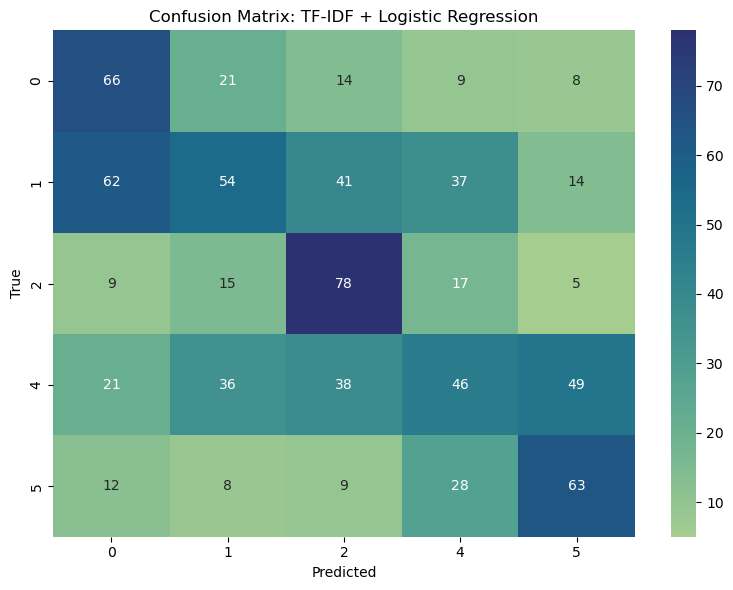

Weighted ROC AUC: 0.7291


In [249]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
train_acc = accuracy_score(y_train, logreg_pipeline.predict(X_train)) * 100
test_acc = accuracy_score(y_test, y_pred_lr) * 100

print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Testing Accuracy: {test_acc:.2f}%\n")

# Classification Report
print(" result:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
labels = sorted(df['Encoded_Sentiment'].unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix: TF-IDF + Logistic Regression")
plt.tight_layout()
plt.show()

# ROC AUC (Optional multiclass)
y_test_bin = label_binarize(y_test, classes=labels)
y_score = logreg_pipeline.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovr')
print(f"Weighted ROC AUC: {roc_auc:.4f}")


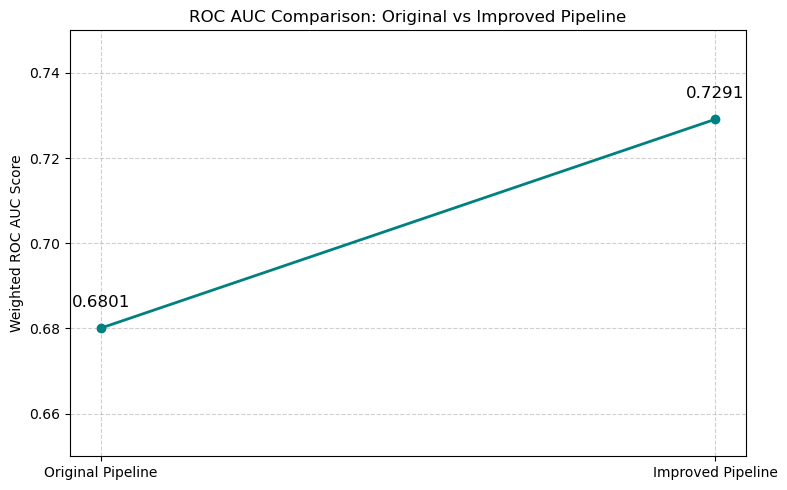

In [251]:
import matplotlib.pyplot as plt

# ROC AUC data
models = ['Original Pipeline', 'Improved Pipeline']
roc_auc_scores = [0.6801, 0.7291]

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(models, roc_auc_scores, marker='o', linestyle='-', color='teal', linewidth=2)

# Annotate scores
for i, score in enumerate(roc_auc_scores):
    plt.text(i, score + 0.005, f"{score:.4f}", ha='center', fontsize=12)

plt.title('ROC AUC Comparison: Original vs Improved Pipeline')
plt.ylabel('Weighted ROC AUC Score')
plt.ylim(0.65, 0.75)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# summary:
The logistic regression model demonstrates decent learning on the training set (67.25%) but lacks strong generalization to the test set (40.39%), indicating mild overfitting — though it still outperforms Naive Bayes.
The improved pipeline achieves a higher weighted ROC AUC (0.7291 vs. 0.6801), indicating better overall class separation and predictive performance compared to the original model.